In [26]:
!pip install tensorflow opencv-python matplotlib streamlit pandas pydot

In [27]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [29]:
import tensorflow as tf
import pandas as pd
import os
import cv2
import matplotlib
from matplotlib import pyplot as plt

In [30]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import KFold
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import l2

In [32]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [33]:
data_train_path = 'Data/Training'
data_test_path = 'Data/Test'
img_width, img_height = 180, 180
batch_size = 32

In [34]:
data_train_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

In [35]:
def create_model():
    model = Sequential()

    model.add(Input(shape=(img_width, img_height, 3)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(256, kernel_regularizer=l2(0.03)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(Dropout(0.4))

    model.add(layers.Dense(36, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [36]:
print("Training classes:", train_gen.class_indices)
print("Validation classes:", val_gen.class_indices)

Training classes: {'f10-12%': 0, 'f13-15%': 1, 'f16-18%': 2, 'f19-21%': 3, 'f22-24%': 4, 'f25-27%': 5, 'f28-30%': 6, 'f31-33%': 7, 'f34-36%': 8, 'f37-39%': 9, 'f40-42%': 10, 'f43-45%': 11, 'f46-48%': 12, 'f49-51%': 13, 'f52-54%': 14, 'm11-12%': 15, 'm13-14%': 16, 'm15-16%': 17, 'm17-18%': 18, 'm19-20%': 19, 'm21-22%': 20, 'm23-24%': 21, 'm25-26%': 22, 'm27-28%': 23, 'm29-30%': 24, 'm3%': 25, 'm31-32%': 26, 'm33-34%': 27, 'm35-36%': 28, 'm37-38%': 29, 'm39-40%': 30, 'm4%': 31, 'm41-42%': 32, 'm5-6%': 33, 'm7-8%': 34, 'm9-10%': 35}
Validation classes: {'f10-12%': 0, 'f13-15%': 1, 'f16-18%': 2, 'f19-21%': 3, 'f22-24%': 4, 'f25-27%': 5, 'f28-30%': 6, 'f31-33%': 7, 'f34-36%': 8, 'f37-39%': 9, 'f40-42%': 10, 'f43-45%': 11, 'f46-48%': 12, 'f49-51%': 13, 'f52-54%': 14, 'm11-12%': 15, 'm13-14%': 16, 'm15-16%': 17, 'm17-18%': 18, 'm19-20%': 19, 'm21-22%': 20, 'm23-24%': 21, 'm25-26%': 22, 'm27-28%': 23, 'm29-30%': 24, 'm3%': 25, 'm31-32%': 26, 'm33-34%': 27, 'm35-36%': 28, 'm37-38%': 29, 'm39-40

In [37]:
train_classes = set(train_gen.class_indices.keys())
val_classes = set(val_gen.class_indices.keys())

missing_in_val = train_classes - val_classes
extra_in_val = val_classes - train_classes

print(f"Classes missing in validation set: {missing_in_val}")
print(f"Extra classes in validation set: {extra_in_val}")

Classes missing in validation set: set()
Extra classes in validation set: set()


In [38]:
def check_folder_contents(path):
    for folder_name in os.listdir(path):
        folder_path = os.path.join(path, folder_name)
        if os.path.isdir(folder_path):
            num_files = len(os.listdir(folder_path))
            print(f"Folder: {folder_name}, Number of files: {num_files}")

print("Training Set Folders:")
check_folder_contents('Data/Training')

print("\nValidation Set Folders:")
check_folder_contents('Data/Validation')

Training Set Folders:
Folder: f10-12%, Number of files: 16
Folder: f13-15%, Number of files: 16
Folder: f16-18%, Number of files: 12
Folder: f19-21%, Number of files: 22
Folder: f22-24%, Number of files: 23
Folder: f25-27%, Number of files: 38
Folder: f28-30%, Number of files: 9
Folder: f31-33%, Number of files: 7
Folder: f34-36%, Number of files: 8
Folder: f37-39%, Number of files: 7
Folder: f40-42%, Number of files: 17
Folder: f43-45%, Number of files: 13
Folder: f46-48%, Number of files: 11
Folder: f49-51%, Number of files: 7
Folder: f52-54%, Number of files: 6
Folder: m11-12%, Number of files: 29
Folder: m13-14%, Number of files: 20
Folder: m15-16%, Number of files: 14
Folder: m17-18%, Number of files: 14
Folder: m19-20%, Number of files: 13
Folder: m21-22%, Number of files: 10
Folder: m23-24%, Number of files: 10
Folder: m25-26%, Number of files: 8
Folder: m27-28%, Number of files: 15
Folder: m29-30%, Number of files: 12
Folder: m3%, Number of files: 4
Folder: m31-32%, Number of f

In [39]:
def list_folder_names(path):
    return sorted([folder_name for folder_name in os.listdir(path) if os.path.isdir(os.path.join(path, folder_name))])

train_folders = list_folder_names('Data/Training')
val_folders = list_folder_names('Data/Validation')

print("Training Folders:", train_folders)
print("Validation Folders:", val_folders)

Training Folders: ['f10-12%', 'f13-15%', 'f16-18%', 'f19-21%', 'f22-24%', 'f25-27%', 'f28-30%', 'f31-33%', 'f34-36%', 'f37-39%', 'f40-42%', 'f43-45%', 'f46-48%', 'f49-51%', 'f52-54%', 'm11-12%', 'm13-14%', 'm15-16%', 'm17-18%', 'm19-20%', 'm21-22%', 'm23-24%', 'm25-26%', 'm27-28%', 'm29-30%', 'm3%', 'm31-32%', 'm33-34%', 'm35-36%', 'm37-38%', 'm39-40%', 'm4%', 'm41-42%', 'm5-6%', 'm7-8%', 'm9-10%']
Validation Folders: ['f10-12%', 'f13-15%', 'f16-18%', 'f19-21%', 'f22-24%', 'f25-27%', 'f28-30%', 'f31-33%', 'f34-36%', 'f37-39%', 'f40-42%', 'f43-45%', 'f46-48%', 'f49-51%', 'f52-54%', 'm11-12%', 'm13-14%', 'm15-16%', 'm17-18%', 'm19-20%', 'm21-22%', 'm23-24%', 'm25-26%', 'm27-28%', 'm29-30%', 'm3%', 'm31-32%', 'm33-34%', 'm35-36%', 'm37-38%', 'm39-40%', 'm4%', 'm41-42%', 'm5-6%', 'm7-8%', 'm9-10%']


In [40]:
from PIL import Image

def check_images_in_folder(folder_path):
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        try:
            img = Image.open(file_path)
            img.verify()  
        except (IOError, SyntaxError) as e:
            print(f"Corrupted image found: {file_path}")

for folder in train_folders:
    check_images_in_folder(os.path.join('Data/Training', folder))

for folder in val_folders:
    check_images_in_folder(os.path.join('Data/Validation', folder))

In [41]:
train_gen = data_train_gen.flow_from_directory(
    'Data/Training',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = data_train_gen.flow_from_directory(
    'Data/Validation',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

print("Training classes:", train_gen.class_indices)
print("Validation classes:", val_gen.class_indices)

Found 481 images belonging to 36 classes.
Found 259 images belonging to 36 classes.
Training classes: {'f10-12%': 0, 'f13-15%': 1, 'f16-18%': 2, 'f19-21%': 3, 'f22-24%': 4, 'f25-27%': 5, 'f28-30%': 6, 'f31-33%': 7, 'f34-36%': 8, 'f37-39%': 9, 'f40-42%': 10, 'f43-45%': 11, 'f46-48%': 12, 'f49-51%': 13, 'f52-54%': 14, 'm11-12%': 15, 'm13-14%': 16, 'm15-16%': 17, 'm17-18%': 18, 'm19-20%': 19, 'm21-22%': 20, 'm23-24%': 21, 'm25-26%': 22, 'm27-28%': 23, 'm29-30%': 24, 'm3%': 25, 'm31-32%': 26, 'm33-34%': 27, 'm35-36%': 28, 'm37-38%': 29, 'm39-40%': 30, 'm4%': 31, 'm41-42%': 32, 'm5-6%': 33, 'm7-8%': 34, 'm9-10%': 35}
Validation classes: {'f10-12%': 0, 'f13-15%': 1, 'f16-18%': 2, 'f19-21%': 3, 'f22-24%': 4, 'f25-27%': 5, 'f28-30%': 6, 'f31-33%': 7, 'f34-36%': 8, 'f37-39%': 9, 'f40-42%': 10, 'f43-45%': 11, 'f46-48%': 12, 'f49-51%': 13, 'f52-54%': 14, 'm11-12%': 15, 'm13-14%': 16, 'm15-16%': 17, 'm17-18%': 18, 'm19-20%': 19, 'm21-22%': 20, 'm23-24%': 21, 'm25-26%': 22, 'm27-28%': 23, 'm29-30%'

In [42]:
data_train_path = 'Data/Training'
data_val_path = 'Data/Validation'
img_width, img_height = 180, 180
batch_size = 32
ep = 200 

num_classes = train_gen.num_classes

data_train_gen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
)

data_val_gen = ImageDataGenerator(
    rescale=1.0/255
)

def create_model(num_classes):
    model = Sequential()
    
    model.add(Input(shape=(img_width, img_height, 3)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    
    model.add(Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(Dropout(0.4))

    model.add(Dense(256, kernel_regularizer=l2(0.03)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(Dropout(0.4))

    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

k = 5  
kfold = KFold(n_splits=k, shuffle=True, random_state=42)
fold_no = 1
accuracies = []

best_accuracy = 0  
best_model_file = None  

save_dir = "models/"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for train_index, val_index in kfold.split(np.zeros(len(os.listdir(data_train_path)))):
    print(f"Training on fold {fold_no}...")

    
    train_gen = data_train_gen.flow_from_directory(
        data_train_path,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )
    val_gen = data_val_gen.flow_from_directory(
        data_val_path,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=True
    )

    labels = train_gen.classes
    class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
    class_weights = dict(enumerate(class_weights))

    model = create_model(num_classes)

    checkpoint_file = os.path.join(save_dir, f'best_model_fold_{fold_no}.keras')
    checkpoint = ModelCheckpoint(checkpoint_file, monitor='val_accuracy', save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, restore_best_weights=True)

    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=ep,
        batch_size=batch_size,
        verbose=1,
        callbacks=[early_stopping, checkpoint],
        class_weight=class_weights  
    )

    val_accuracy = model.evaluate(val_gen, verbose=0)[1]
    print(f"Validation accuracy for fold {fold_no}: {val_accuracy * 100:.2f}%")
    accuracies.append(val_accuracy)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model_file = checkpoint_file

    fold_no += 1

print(f"Average validation accuracy across all folds: {np.mean(accuracies) * 100:.2f}%")
print(f"Best model file: {best_model_file} with accuracy: {best_accuracy * 100:.2f}%")

Training on fold 1...
Found 481 images belonging to 36 classes.
Found 259 images belonging to 36 classes.
Epoch 1/200


C:\Users\ag393\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0405 - loss: 9.0773 - val_accuracy: 0.0425 - val_loss: 8.2111
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0487 - loss: 8.3233 - val_accuracy: 0.0193 - val_loss: 7.7997
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0821 - loss: 7.6783 - val_accuracy: 0.0232 - val_loss: 7.4694
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1583 - loss: 6.7434 - val_accuracy: 0.0386 - val_loss: 7.0254
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1001 - loss: 6.3738 - val_accuracy: 0.0425 - val_loss: 6.7128
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1282 - loss: 5.9895 - val_accuracy: 0.0425 - val_loss: 6.3064
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1616 - loss: 5.6559 - val_accuracy: 0.0347 - val_loss: 6.0999
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1617 - loss: 5.2706 - val_accuracy: 0.0463 - val_loss: 5.7

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8247 - loss: 0.8449 - val_accuracy: 0.4788 - val_loss: 2.3097
Epoch 52/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8137 - loss: 0.8450 - val_accuracy: 0.5212 - val_loss: 2.2472
Epoch 53/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8017 - loss: 0.8484 - val_accuracy: 0.4826 - val_loss: 2.4046
Epoch 54/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8218 - loss: 0.8127 - val_accuracy: 0.4826 - val_loss: 2.2022
Epoch 55/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8504 - loss: 0.7754 - val_accuracy: 0.4942 - val_loss: 2.3148
Epoch 56/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8337 - loss: 0.7456 - val_accuracy: 0.4479 - val_loss: 2.5242
Epoch 57/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8465 - loss: 0.7334 - val_accuracy: 0.3668 - val_loss: 2.9326
Epoch 58/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8399 - loss: 0.7643 - val_accuracy: 0.5097 - val_lo

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9404 - loss: 0.4253 - val_accuracy: 0.4054 - val_loss: 2.8184
Validation accuracy for fold 1: 55.21%
Training on fold 2...
Found 481 images belonging to 36 classes.
Found 259 images belonging to 36 classes.
Epoch 1/200


C:\Users\ag393\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0275 - loss: 9.1724 - val_accuracy: 0.0309 - val_loss: 8.2947
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0483 - loss: 8.3007 - val_accuracy: 0.0116 - val_loss: 7.7665
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.0866 - loss: 7.6247 - val_accuracy: 0.0232 - val_loss: 7.3758
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0813 - loss: 7.0401 - val_accuracy: 0.0116 - val_loss: 7.0286
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0987 - loss: 6.6722 - val_accuracy: 0.0154 - val_loss: 6.7529
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1442 - loss: 5.8163 - val_accuracy: 0.0232 - val_loss: 6.3792
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1083 - loss: 5.6173 - val_accuracy: 0.0386 - val_loss: 6.0477
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.1775 - loss: 5.0535 - val_accuracy: 0.0502 - val_loss: 5.9

16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7630 - loss: 0.9934 - val_accuracy: 0.4208 - val_loss: 2.5012
Epoch 52/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7751 - loss: 0.9446 - val_accuracy: 0.4710 - val_loss: 2.3107
Epoch 53/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8022 - loss: 0.8563 - val_accuracy: 0.3745 - val_loss: 2.8679
Epoch 54/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8082 - loss: 0.8717 - val_accuracy: 0.4981 - val_loss: 2.2495
Epoch 55/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8085 - loss: 0.9005 - val_accuracy: 0.4903 - val_loss: 2.2440
Epoch 56/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8367 - loss: 0.7663 - val_accuracy: 0.4826 - val_loss: 2.2357
Epoch 57/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.7916 - loss: 0.8159 - val_accuracy: 0.4054 - val_loss: 2.9628
Epoch 58/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8175 - loss: 0.7269 - val_accuracy: 0.5251 - val_lo

C:\Users\ag393\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.0404 - loss: 9.0587 - val_accuracy: 0.0347 - val_loss: 8.7146
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.0589 - loss: 8.2364 - val_accuracy: 0.0502 - val_loss: 7.7448
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1048 - loss: 7.4699 - val_accuracy: 0.0270 - val_loss: 7.3768
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.0554 - loss: 7.0578 - val_accuracy: 0.0386 - val_loss: 7.0260
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1454 - loss: 6.5076 - val_accuracy: 0.0386 - val_loss: 6.7105
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1536 - loss: 5.8768 - val_accuracy: 0.0309 - val_loss: 6.4256
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1359 - loss: 5.5824 - val_accuracy: 0.0386 - val_loss: 6.1896
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.1573 - loss: 5.1962 - val_accuracy: 0.0193 - val_loss: 6.0

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7701 - loss: 1.4381 - val_accuracy: 0.4749 - val_loss: 2.2686
Epoch 52/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8333 - loss: 0.7966 - val_accuracy: 0.4981 - val_loss: 2.1699
Epoch 53/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.7984 - loss: 0.7768 - val_accuracy: 0.4131 - val_loss: 2.3936
Epoch 54/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8346 - loss: 0.7963 - val_accuracy: 0.4826 - val_loss: 2.3234
Epoch 55/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8118 - loss: 0.7458 - val_accuracy: 0.4015 - val_loss: 2.7204
Epoch 56/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8481 - loss: 0.7704 - val_accuracy: 0.5135 - val_loss: 2.2353
Epoch 57/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8293 - loss: 0.7041 - val_accuracy: 0.4903 - val_loss: 2.1983
Epoch 58/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.8680 - loss: 0.6416 - val_accuracy: 0.5058 - val_lo

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
The predicted class for the image is: ('m37-38%', 50.38381814956665)


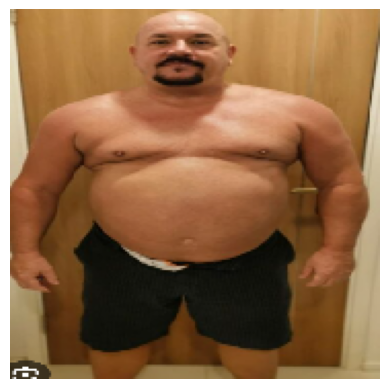

In [78]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

best_model = tf.keras.models.load_model(best_model_file)


def predict_single_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))
    
    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)
    
    img_array = img_array / 255.0
    
    prediction = best_model.predict(img_array)
    
    predicted_class = np.argmax(prediction, axis=1)
    
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class_index]*100
    
    class_labels = list(train_gen.class_indices.keys())
    predicted_label = class_labels[predicted_class_index]
    
    return predicted_label, confidence

img_path = r"C:\Users\ag393\OneDrive\Documente\BodyFatApp\40percenter.png"
predicted_label = predict_single_image(img_path)
print(f"The predicted class for the image is: {predicted_label}")
img = image.load_img(img_path, target_size=(img_height, img_width))
plt.imshow(img)
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Loss')

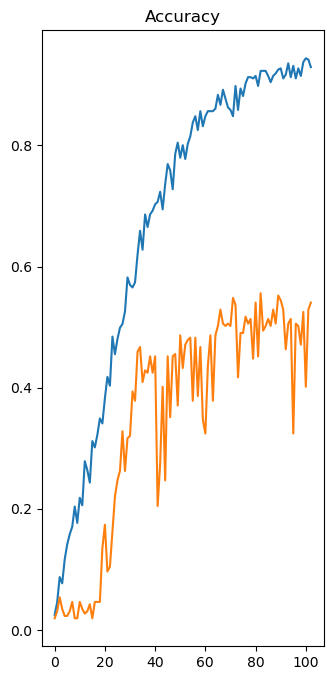

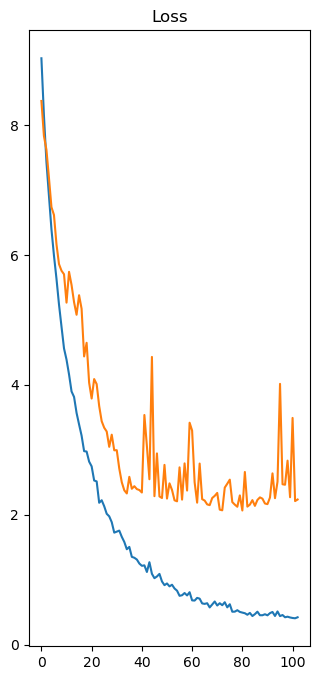

In [87]:
epochs_range=range(103)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'], label='Validation Loss')
plt.title('Loss')

In [90]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 180, 180, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_90               │ (None, 180, 180, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 90, 90, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_91               │ (None, 90, 90, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 45, 45, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_92               │ (None, 45, 45, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 22, 22, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 22, 22, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_93               │ (None, 22, 22, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 11, 11, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_94               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_30 (Activation)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_95               │ (None, 256)                 │           1,0

 Total params: 28,973,678 (110.53 MB)

 Trainable params: 9,656,996 (36.84 MB)

 Non-trainable params: 2,688 (10.50 KB)

 Optimizer params: 19,313,994 (73.68 MB)